In [1]:
import sys
sys.path.append('../')
import models
import models.mnist
from data import get_loaders
from utils import DictWrapper

In [2]:
%load_ext autoreload
%autoreload 1

In [3]:
%aimport log_plotter
from log_plotter import get_run_names, get_data_pth_events ,get_run_names_events, get_data_pth, plot_smooth, plot_tag, plot_runs_and_tags, get_legend, plot_smooth_o1

In [4]:
no_title = True
save_single = True
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42  # 3
matplotlib.rcParams['ps.fonttype'] = 42  # 3
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [5]:
no_title = True
save_single = False
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 3
matplotlib.rcParams['ps.fonttype'] = 3
plt.rcParams.update({'font.size': 16})
markeroff = True

## Shared Params

In [6]:
get_data_f = get_data_pth_events
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/h/iman/Code/nuqsgd/runs'
lg_tags = ['estim_sgd', 'nuq_method', 'nuq_sym', 'nuq_inv','nuq_mul', 'p2']  # , 'ngpu', 'bits', 'mul', 'bucket_size'
orders = ['SuperSGD', 'ALQ', 'AMQ', 'Qinf', 'TRN', 'NUQ,p=0.5', 'SGD', 'ALQ-N', 'AMQ-N']
lg_replace = [('p2_', 'P='), ('estim_sgd', 'SGD'), ('nuq_mul_', 'p='), ('ngpu_', 'GPU='), ('nuq_method', ''), ('_q', 'Q'), ('nuq_inv_', 'Inv'), ('nuq_sym_', 'Sym'), ('_amq_nb', 'AMQ'), ('_amq', 'AMQ-N'), ('_alq_nb', 'ALQ'), ('_trn', 'TRN'), ('_alq', 'ALQ'), ('_qinf', 'Qinf'), ('kfac', 'K-FAC'), ('SGD,K-FAC', 'K-FAC'), ('estim_ntk', 'NTK'), ('adamw', 'AdamW'), ('adam', 'Adam'), ('lr_', 'LR='), ('LR=0.001', 'LR=1e-3'), ('LR=0.0001', 'LR=1e-4'), ('LR=0.0005', 'LR=5e-4'), ('LR=0.0002', 'LR=2e-4'), ('batch_size_', 'bs='), ('optim_start_', 'Start='), ('damping_', '$\epsilon=$'), ('_l2q', 'L2Q'), ('_none', 'SuperSGD'), ('nuq_layer_1', 'w/o layers'), ('nuq_layer_0', 'w/ layers'),('_nuq', 'NUQ')]
tag_names = ['est_var', 'nb_error', 'Vloss', 'Tloss', 'Vacc']
ylim = [None]*20
sep_h = False
ncolor = None
ylim = [[6*1e-8, 6*1e-6], [0, 0.2*1e-3], [1, 4], [0, 4], [30, 100]]

save_single = True

# ImageNet ylim

In [7]:
ylim = [[5*1e-8, 5*1e-6], [0, 0.2*1e-3], [1, 4], [0, 4], [30, 70]]

# CIFAR10 bucket 16384

../log_plotter.py:311: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim)


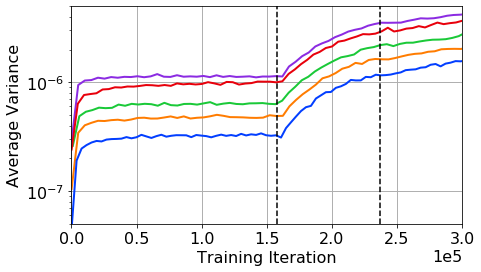

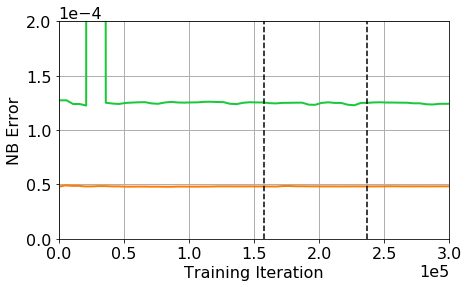

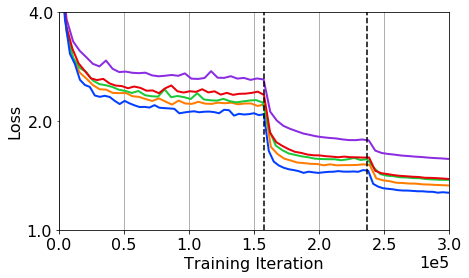

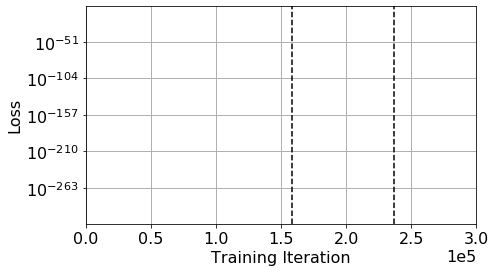

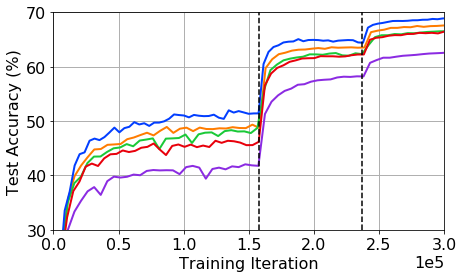

<Figure size 504x288 with 0 Axes>

In [8]:
patterns = ['.*runs_imagenet_full/.*i42?_.*nuq_method_(none|qinf|trn|amq_nb|alq_nb)(?!(.*nuq_sym.*|.*nuq_inv.*|.*alq,.*|.*amq_nb.*))']

fig_name = 'figs_nuq/imagenet-half-g.png'
lr_schedules = [158*1e3, 237*1e3]
acc_bits = 2
xlim = [0, 300*1e3]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, vlines=lr_schedules, color_order=orders, xlim=xlim, no_title=True, acc_bits=acc_bits, markeroff=markeroff)

../log_plotter.py:311: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim)


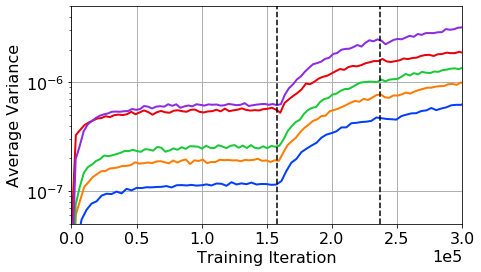

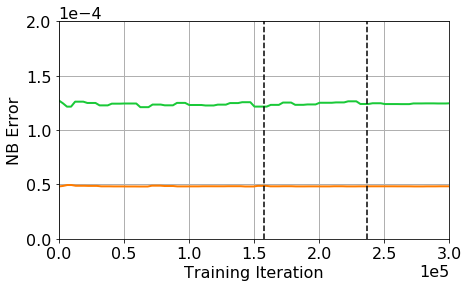

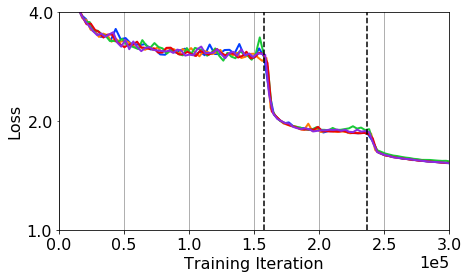

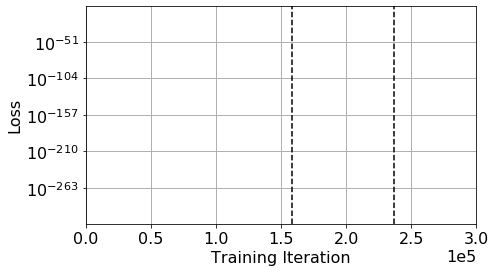

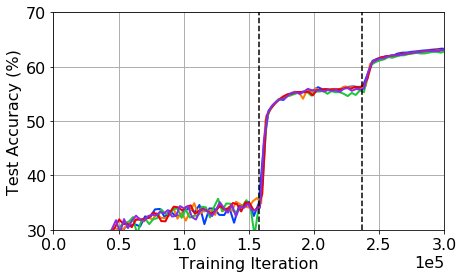

<Figure size 504x288 with 0 Axes>

In [9]:
patterns = ['.*runs_imagenet_full/.*i3_.*(none|qinf|trn|amq_nb|alq_nb)(?!(.*nuq_sym.*|.*nuq_inv.*|.*alq,.*|.*amq_nb.*))']

fig_name = 'figs_nuq/imagenet-half.png'
lr_schedules = [158*1e3, 237*1e3]


xlim = [0, 300*1e3]
acc_bits = 2
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, vlines=lr_schedules, color_order=orders, xlim=xlim, no_title=True, acc_bits=acc_bits, markeroff=markeroff)

# ResNet-32 ylim

In [10]:
ylim = [[0.1*1e-8, 12*1e-6], [0, 0.2*1e-3], [0, 2.5], [0, 2.5], [30, 100]]

## ResNet-32 with goptim

../log_plotter.py:311: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim)
../log_plotter.py:311: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim)


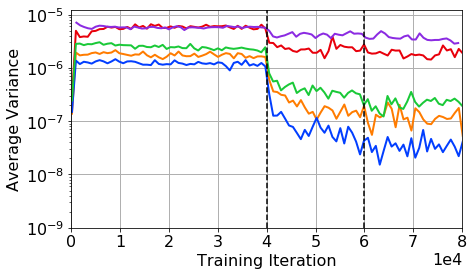

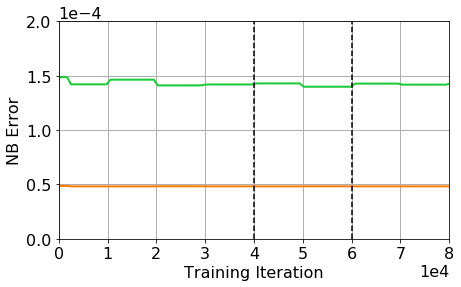

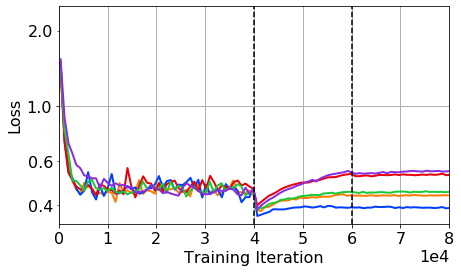

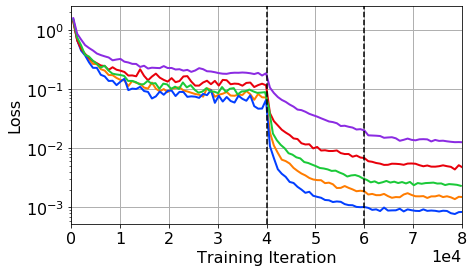

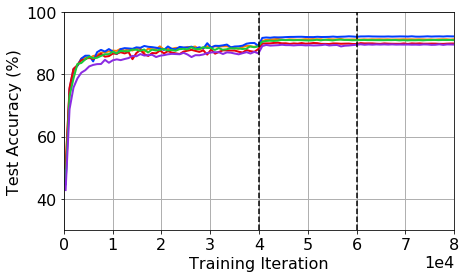

<Figure size 504x288 with 0 Axes>

In [25]:
patterns = ['.*runs_cifar10_full/.*(f23|r2)_(037.*nuq_method_none.*|.*resnet32.*nuq_bits_3.*nuq_bucket_size_81.*nuq_method_(qinf|trn|amq_nb|alq_nb)(?!(.*nuq_sym.*|.*nuq_inv)))'] # resnet110 for paper

fig_name = 'figs_nuq/resnet32-bs-81-bits-3-g.png'
lr_schedules = [40*1e3, 60*1e3]
xlim = [0, 80*1e3]

acc_bits = 2
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, vlines=lr_schedules, color_order=orders, xlim=xlim, no_title=True, acc_bits=acc_bits)

## ResNet-32 without goptim

../log_plotter.py:311: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim)
../log_plotter.py:311: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim)


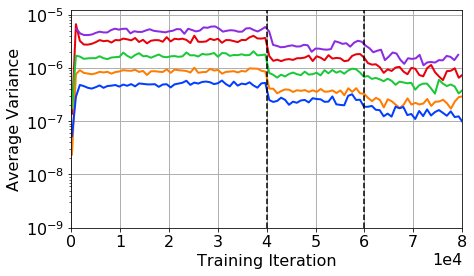

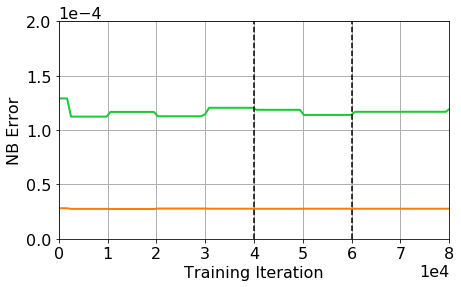

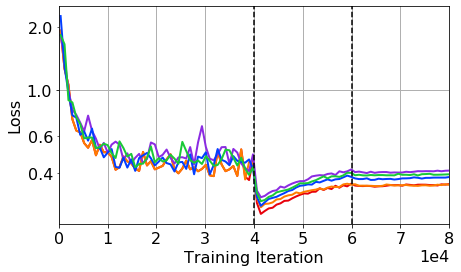

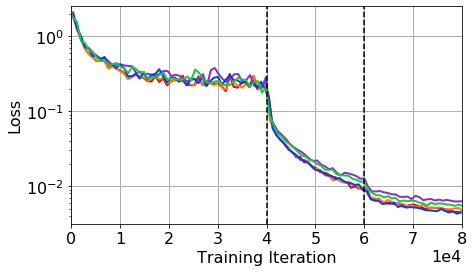

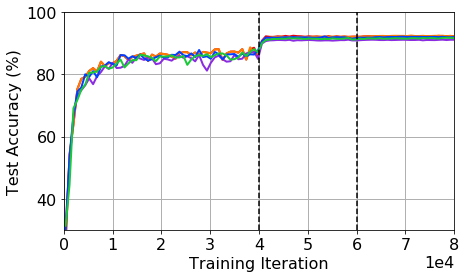

<Figure size 504x288 with 0 Axes>

In [27]:
patterns = ['.*runs_cifar10_full/.*(f13|r1)_(037.*nuq_method_none.*|.*resnet32.*nuq_bits_3.*nuq_bucket_size_16.*nuq_method_(qinf|trn|amq_nb|alq_nb)(?!(.*nuq_sym.*|.*nuq_inv)))'] # resnet110 for paper

fig_name = 'figs_nuq/resnet32-bs-81-bits-3.png'
lr_schedules = [40*1e3, 60*1e3]
xlim = [0, 80*1e3]

acc_bits = 1
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, vlines=lr_schedules, color_order=orders, xlim=xlim, no_title=True, acc_bits=acc_bits)

## ResNet-110 without goptim

../log_plotter.py:311: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim)
../log_plotter.py:311: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim)


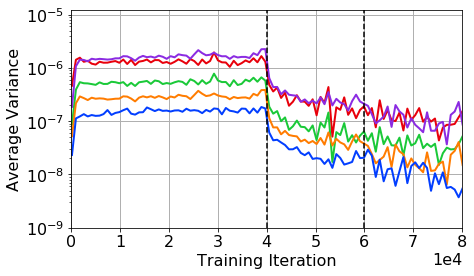

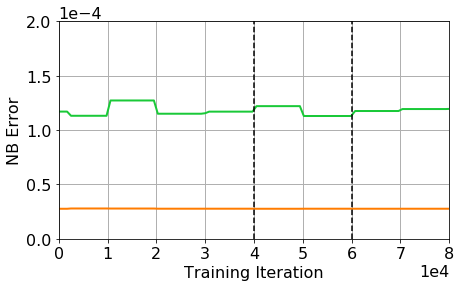

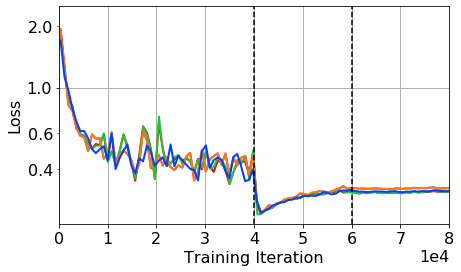

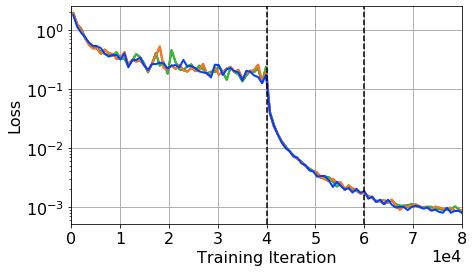

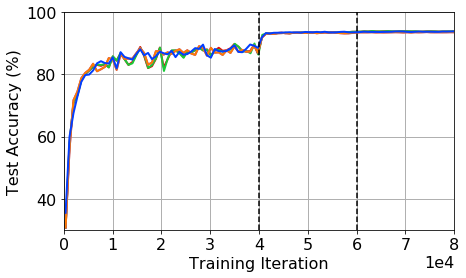

<Figure size 504x288 with 0 Axes>

In [45]:

patterns = ['.*runs_cifar10_full/.*(f62.*resnet110.*nuq_method_(none|qinf|trn|amq_nb|alq_nb)(?!(.*nuq_sym.*|.*nuq_inv)))'] # resnet110 for paper

fig_name = 'figs_nuq/resnet110-bs-16-bits-3.png'
lr_schedules = [40*1e3, 60*1e3]
xlim = [0, 80*1e3]
acc_bits = 2
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, vlines=lr_schedules, color_order=orders, xlim=xlim, no_title=True, acc_bits=acc_bits)

## ResNet-110 with goptim

../log_plotter.py:311: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim)
../log_plotter.py:311: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim)


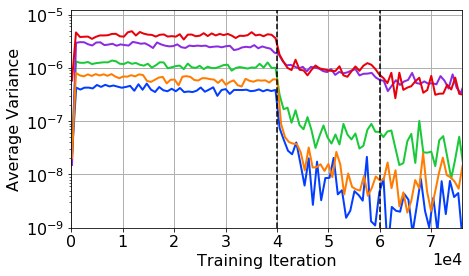

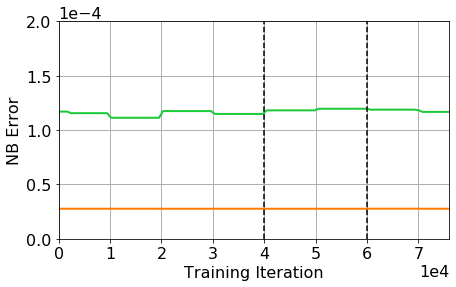

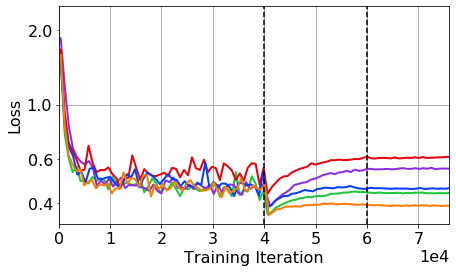

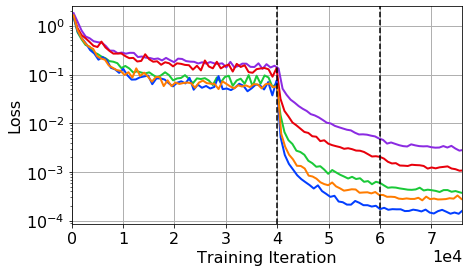

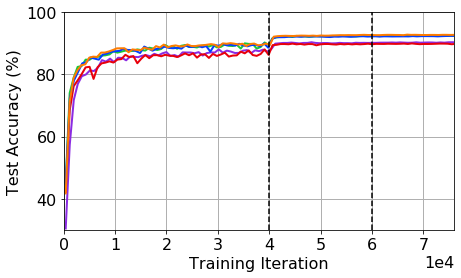

<Figure size 504x288 with 0 Axes>

In [44]:
patterns = ['.*runs_cifar10_full/.*(f61.*resnet110.*nuq_method_(none|qinf|trn|amq_nb|alq_nb)(?!(.*nuq_sym.*|.*nuq_inv)))'] # resnet110 for paper

fig_name = 'figs_nuq/resnet110-bs-16-bits-3-g.png'
lr_schedules = [40*1e3, 60*1e3]
xlim = [0, 76*1e3]

acc_bits = 2
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, vlines=lr_schedules, color_order=orders, xlim=xlim, no_title=True, acc_bits=acc_bits)